In [1]:
# import utility methods
from util import *
import pickle
import matplotlib.pyplot as plt

## Question 2: Gradient Descent Algorithm 

### 2 Part(i): Matrix of size (n1n2 X n3n4) and its inf. norm

In [2]:
# phone number
phone_number = 8164527485

# n1,n2,n3 & n4
phone_str = str(phone_number).replace('0','3')
(n1,n2,n3,n4) = [x for x in phone_str[-4:]]
m,n = int(n1+n2), int(n3+n4)

# generate matrix
A = Matrix(m,n,precision=4)
A.random()
print(f"Dimensions of generated matrix: {A.shape()}")

# inf. norm of generated matrix
norm = A.norm('inf')
print(f"Infinite norm of generated matrix: {norm}")

Dimensions of generated matrix: (74, 85)
Infinite norm of generated matrix: 52.213568376060906


### 2 Part(ii): Find the minimum of the given function and value of T

In [3]:
# compute gradient function
def gradient(A,b,x):
    A = A.copy()
    AT = A.transpose(copy=True)
    
    # AT @ b
    B = AT.multiply(b,copy=True)
    
    # AT @ (A @ x)
    AX = A.multiply(x,copy=True)
    L = AT.multiply(AX,copy=True)
    
    # gradient value
    return L.eOps(B,opr="-",copy=True)


# compute tau
def tau(A,b,x):
    A = A.copy()
    AT = A.transpose(copy=True)
    
    # gradient value
    G = gradient(A,b,x)
    GT = G.transpose(copy=True)
    
    # num
    NU = GT.multiply(G,copy=True)
    
    # deno
    DN = GT.multiply(AT,copy=True) 
    DN.multiply(A,update=True)
    DN.multiply(G,update=True)
    
    # Tau
    T = NU.eOps(DN,opr='/',copy=True)
    return T.matrix()[0][0]

# compute Fx
def fx(A,b,x):
    A = A.copy()
    AX = A.multiply(x,copy=True)
    F = AX.eOps(b,opr='-',copy=True)
    
    # l2 norm value
    norm = F.norm(2)
    return (norm**2)/2

In [4]:
# generate random vector b of size (n1n2 x 1)
b = Matrix(m,1,precision=4)
b.random()

# initialize x vector
x1 = Matrix(n,1,precision=4)

# find minimum of fx (iterative)
F = fx(A,b,x1)
c_norm = 1
i = 1
iter_data = {}
while c_norm>(10**-4):
    G = gradient(A,b,x1)
    T = tau(A,b,x1)
    
    # T.G (scalar multiplication)
    G.scalar(T,update=True)
    x2 = x1.eOps(G,opr='-',copy=True)
    x_diff = x2.eOps(x1,opr='-',copy=True)
    c_norm = x_diff.norm(2)
    x1 = x2
    F = fx(A,b,x1)
    iter_data[i] = {"x":x1.matrix(),"fx":F}
    i += 1

# output file
fHandler = open('output.bin','wb')
pickle.dump(iter_data,fHandler)
iter_data=None
fHandler.close()

# compute Fx
F = fx(A,b,x1)
T = tau(A,b,x1)
print(f"Minimum value of given function :{F}")
print(f"Value of T: {T}")


Minimum value of given function :0.005646057306650772
Value of T: 0.046659065414751774


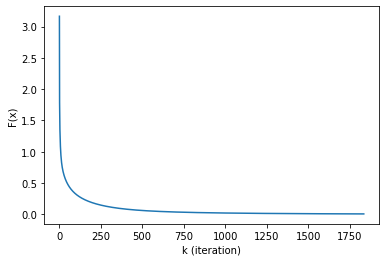

In [5]:
# graph fx vs k
fHandler = open('output.bin','rb')
X,Y=[],[]
k = 1
data = pickle.load(fHandler)
for k in range(1,len(data.keys())+1):
    X.append(int(k))
    fx = data[k]['fx']
    Y.append(float(fx))
    k+=1
fHandler.close()

# plot graph
plt.plot(X,Y)
plt.xlabel('k (iteration)')
plt.ylabel('F(x)')
plt.show()